# Chapter 5: Support Vector Machines

### Ensure GPU env is working correctly

In [1]:
import tensorflow as tf
from tensorflow import keras 

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import sys
import os
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

## Linear SVM Classification 

### Load in libraries and IRIS dataset

In [46]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

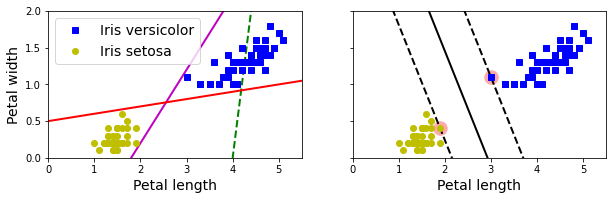

In [47]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### Sensitivity to feature scaling

(-2.0, 2.0, -2.0, 2.0)

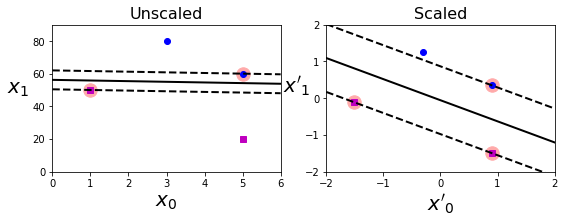

In [48]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])


## Soft Margin Classification (Hard margin sensitivty to outliers)

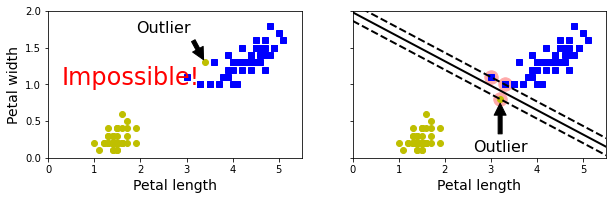

In [49]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

## Regularization Plot with Margin Violations

In [4]:
import numpy as np
from sklearn import datasets 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [5]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

D:\Anaconda\envs\GPUenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [9]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

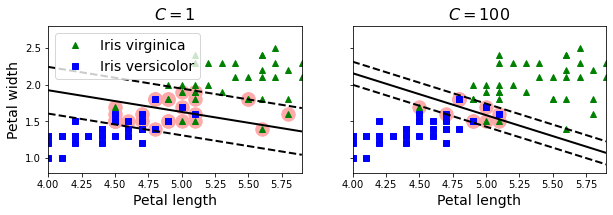

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])


## Non-Linear SVM Classification

In [11]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

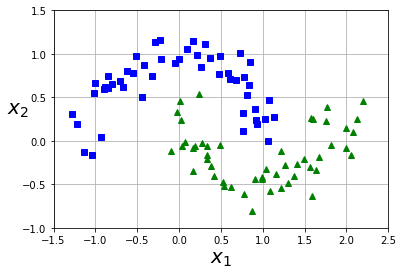

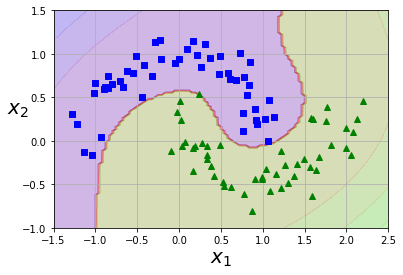

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Kernel Example

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [14]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

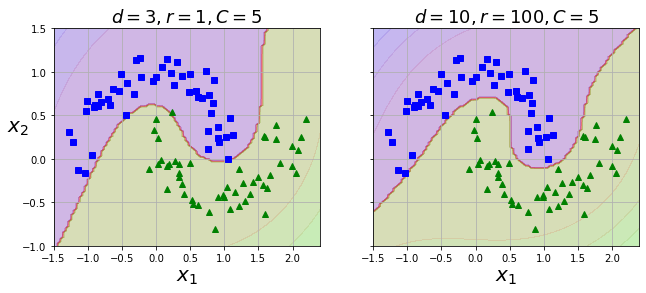

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

## Similarity Features using the Gaussian RBF

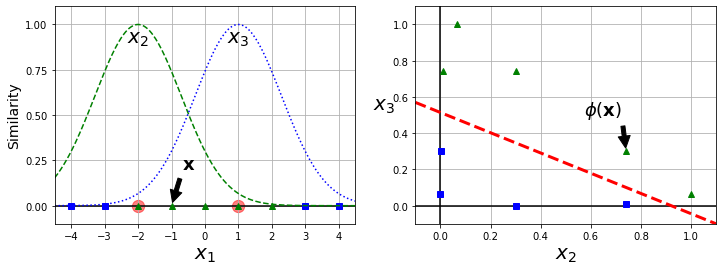

In [16]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

## Gaussian RBF Kernel Example

In [17]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

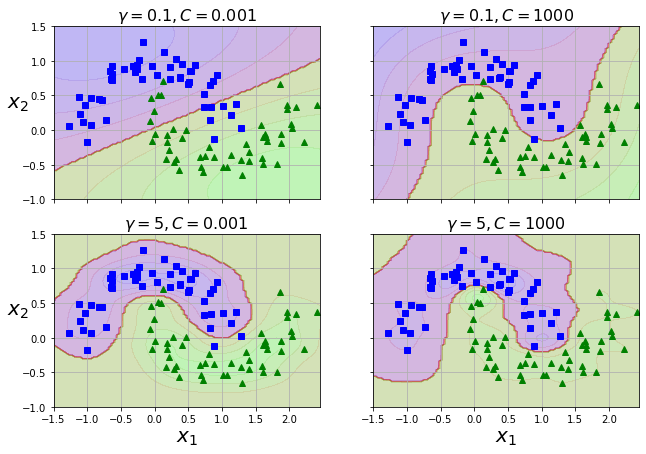

In [18]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

## SVM Regression

In [19]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [20]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [21]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

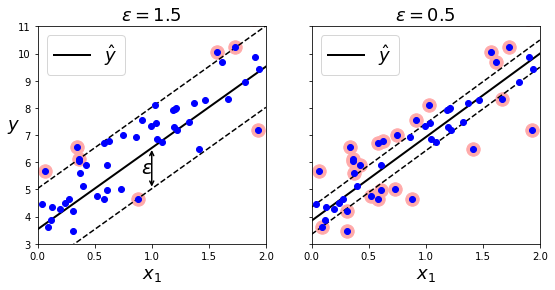

In [22]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [23]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [24]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

## Second-Degree Polynomial Kernel

In [25]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

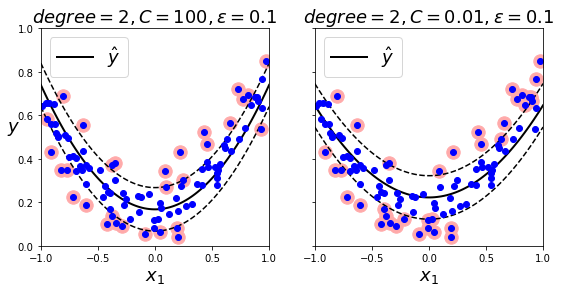

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

In [27]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

## Decision Functions and Predictions using the IRIS Dataset

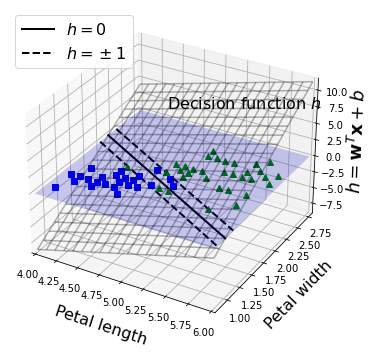

In [28]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

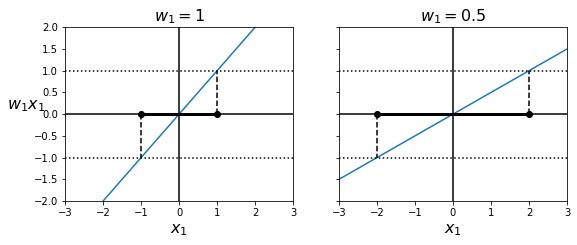

In [29]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

# End of Chapter Exercises

1. What is the fundamental idea behind Support Vector Machines?
2. What is a support vector?
3. Why is it important to scale the inputs when using SVMs?
4. Can an SVM classifier output a confidence score when it classifies an instance?
   What about a probability?
5. Should you use the primal or the dual form of the SVM problem to train a model
   on a training set with millions of instances and hundreds of features?
6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit
   the training set. Should you increase or decrease γ (gamma)? What about C?
7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin
   linear SVM classifier problem using an off-the-shelf QP solver?
8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
   SGDClassifier on the same dataset. See if you can get them to produce roughly
   the same model.
9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
   classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
   may want to tune the hyperparameters using small validation sets to speed up the
   process. What accuracy can you reach?
10. Train an SVM regressor on the California housing dataset.


**1. What is the fundamental idea behind Support Vector Machines?**

A: The fundamental idea behind SVMs is trying to fit the widest possible street between the classes of data you are trying to seperate

**2. What is a support vector?**

A: These are the instances that are located on the edge of the "street". This includes the border.

**3. Why is it important to scale the inputs when using SVMs?**

A: SVMs are senstive to feature scales it is trying to seperate. If the vertical scale is larger than the horizontal scale, you get a very thin street. So once the x and y axes are scaled the deicision boundary will perform better and look better overall. 

**4. Can an SVM classifier output a confidence score when it classifies an instance?
   What about a probability?**
   
A: There isn't a confidence score per say. What you would need to do is measure the w* whcih is the function used to maximize the minimum distance between the points and the hyperplane distance. This would be the best instance. There isn't normally a probability associated with SVMs, but in Scikit-Learn the there is a *probability=True* feature that can be used to calibratre probabilities using Logistic Regression for SVMs.

**5. Should you use the primal or the dual form of the SVM problem to train a model
   on a training set with millions of instances and hundreds of features?**
   
A: This depends on the size of the training instnaces. This is denoted by *m*. If there are millions of training instances you should use the primal form because the dual form will be way too slow. SVMs don't scale well with huge data sets and using a dual form SVM has a complexity between m<sup>2</sup> and m<sup>3</sup> which is quite large.

**6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit
   the training set. Should you increase or decrease γ (gamma)? What about C?**
   
A: If it is underfitting, you should increase gamma. You should also increase C in this case as C is the number of hyperparameters we choose to use to fit our SVM model. Usually a high C value is associated with overfitting, so reducing C would help regularize this. 

**7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin
   linear SVM classifier problem using an off-the-shelf QP solver?**
   
A: The problem in the textbook is given for the hard margin problem. In our case, we will saolve for the soft margin scenario.

Here is what we will need: 

**H** is already the identity matrix, but in this question we will add the amount of *m* additional parameters to our identity matrix. Specifically, *m* columns of 0s on the right and bottom to get something like following below denoted by something like H'

- [H 0 ...]
- [0 0 ...]
- [. . . . .]

**f** will be similar to f in the textbook, but with *m* additional elements which are all equal to the hyperparameter *C*.

**b** will also be the same, just with *m* additional elements all equal to 0

finally, **A** will be the same with an extra mxm Identity matrix to the right and below. The following is an example of how this will look
A =
<br>
[A' I<sub>m</sub>]
<br>
    [0 -I<sub>m</sub>]

In [30]:
#Question 8
'''8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model.'''

# use iris dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [31]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Set C hyperparameter to test
C = 0.5
#alpha
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss = "hinge", C=C, random_state=42)
svm_clf = SVC(C=C, kernel = "linear", random_state=42)
sgd_clf = SGDClassifier(loss = "hinge", learning_rate="optimal", early_stopping = True, alpha=alpha, 
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)


print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.32278049] [[1.04902898 0.9404871 ]]
SVC:                          [0.33098665] [[1.05947949 0.91056571]]
SGDClassifier(alpha=0.02000): [0.33271356] [[1.10626404 0.98831903]]


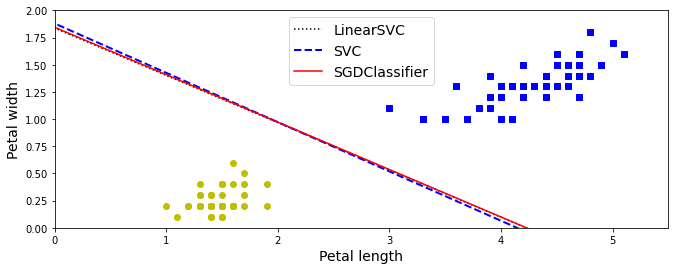

In [32]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

Very close performance for all three models!

In [33]:
#Question 9
import numpy as np
'''9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?'''

# will train one-versus-all classifier for all 10 digits in this instance
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Manual train-test-split
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [34]:
#training on linearSVM
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

D:\Anaconda\envs\GPUenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=42)

In [35]:
#Check metrics 
from sklearn.metrics import accuracy_score 
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [36]:
# try scaling data now 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

D:\Anaconda\envs\GPUenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=42)

In [37]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9217333333333333

In [38]:
# Try SVM w/ rbf
SVM = SVC(kernel = "rbf", gamma="scale")
SVM.fit(X_train_scaled[:5000], y_train[:5000])

SVC()

In [39]:
y_pred = SVM.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9269666666666667

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 100)}
rnd_search_cv = RandomizedSearchCV(SVM, param_distributions, n_iter=100, verbose=2, cv=5)
rnd_search_cv.fit(X_train_scaled[:500], y_train[:500])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ....C=58.69038846263591, gamma=0.009661295989662234; total time=   0.0s
[CV] END ....C=58.69038846263591, gamma=0.009661295989662234; total time=   0.0s
[CV] END ....C=58.69038846263591, gamma=0.009661295989662234; total time=   0.0s
[CV] END ....C=58.69038846263591, gamma=0.009661295989662234; total time=   0.0s
[CV] END ....C=58.69038846263591, gamma=0.009661295989662234; total time=   0.0s
[CV] END .....C=20.52429877980445, gamma=0.02785506848253588; total time=   0.0s
[CV] END .....C=20.52429877980445, gamma=0.02785506848253588; total time=   0.0s
[CV] END .....C=20.52429877980445, gamma=0.02785506848253588; total time=   0.0s
[CV] END .....C=20.52429877980445, gamma=0.02785506848253588; total time=   0.0s
[CV] END .....C=20.52429877980445, gamma=0.02785506848253588; total time=   0.0s
[CV] END .....C=29.07723624408558, gamma=0.00111848955516645; total time=   0.0s
[CV] END .....C=29.07723624408558, gamma=0.001

[CV] END .....C=87.70723185801037, gamma=0.06706271090367462; total time=   0.0s
[CV] END .....C=87.70723185801037, gamma=0.06706271090367462; total time=   0.0s
[CV] END ....C=52.13423988609378, gamma=0.010070072316456567; total time=   0.0s
[CV] END ....C=52.13423988609378, gamma=0.010070072316456567; total time=   0.0s
[CV] END ....C=52.13423988609378, gamma=0.010070072316456567; total time=   0.0s
[CV] END ....C=52.13423988609378, gamma=0.010070072316456567; total time=   0.0s
[CV] END ....C=52.13423988609378, gamma=0.010070072316456567; total time=   0.0s
[CV] END ....C=80.82951789667752, gamma=0.019949309196318328; total time=   0.0s
[CV] END ....C=80.82951789667752, gamma=0.019949309196318328; total time=   0.0s
[CV] END ....C=80.82951789667752, gamma=0.019949309196318328; total time=   0.0s
[CV] END ....C=80.82951789667752, gamma=0.019949309196318328; total time=   0.0s
[CV] END ....C=80.82951789667752, gamma=0.019949309196318328; total time=   0.0s
[CV] END .....C=71.196687725

[CV] END .....C=84.59801205122058, gamma=0.02465746425339271; total time=   0.0s
[CV] END .....C=84.59801205122058, gamma=0.02465746425339271; total time=   0.0s
[CV] END .....C=84.59801205122058, gamma=0.02465746425339271; total time=   0.0s
[CV] END .....C=84.59801205122058, gamma=0.02465746425339271; total time=   0.0s
[CV] END .....C=84.59801205122058, gamma=0.02465746425339271; total time=   0.0s
[CV] END ....C=41.89529444142699, gamma=0.002221204988389937; total time=   0.0s
[CV] END ....C=41.89529444142699, gamma=0.002221204988389937; total time=   0.0s
[CV] END ....C=41.89529444142699, gamma=0.002221204988389937; total time=   0.0s
[CV] END ....C=41.89529444142699, gamma=0.002221204988389937; total time=   0.0s
[CV] END ....C=41.89529444142699, gamma=0.002221204988389937; total time=   0.0s
[CV] END ...C=16.643704267108603, gamma=0.003165816923187968; total time=   0.0s
[CV] END ...C=16.643704267108603, gamma=0.003165816923187968; total time=   0.0s
[CV] END ...C=16.64370426710

[CV] END .....C=8.056874740042984, gamma=0.01926808512875041; total time=   0.0s
[CV] END .....C=8.056874740042984, gamma=0.01926808512875041; total time=   0.0s
[CV] END ...C=3.6511310541621813, gamma=0.014844007412532063; total time=   0.0s
[CV] END ...C=3.6511310541621813, gamma=0.014844007412532063; total time=   0.0s
[CV] END ...C=3.6511310541621813, gamma=0.014844007412532063; total time=   0.0s
[CV] END ...C=3.6511310541621813, gamma=0.014844007412532063; total time=   0.0s
[CV] END ...C=3.6511310541621813, gamma=0.014844007412532063; total time=   0.0s
[CV] END .....C=95.02302414249576, gamma=0.01415625430458641; total time=   0.0s
[CV] END .....C=95.02302414249576, gamma=0.01415625430458641; total time=   0.0s
[CV] END .....C=95.02302414249576, gamma=0.01415625430458641; total time=   0.0s
[CV] END .....C=95.02302414249576, gamma=0.01415625430458641; total time=   0.0s
[CV] END .....C=95.02302414249576, gamma=0.01415625430458641; total time=   0.0s
[CV] END ...C=39.81699262065

[CV] END ....C=86.84127518430118, gamma=0.007210876454272613; total time=   0.0s
[CV] END ....C=86.84127518430118, gamma=0.007210876454272613; total time=   0.0s
[CV] END ....C=86.84127518430118, gamma=0.007210876454272613; total time=   0.0s
[CV] END ....C=86.84127518430118, gamma=0.007210876454272613; total time=   0.0s
[CV] END .....C=76.08710677914974, gamma=0.03229131626456101; total time=   0.0s
[CV] END .....C=76.08710677914974, gamma=0.03229131626456101; total time=   0.0s
[CV] END .....C=76.08710677914974, gamma=0.03229131626456101; total time=   0.0s
[CV] END .....C=76.08710677914974, gamma=0.03229131626456101; total time=   0.0s
[CV] END .....C=76.08710677914974, gamma=0.03229131626456101; total time=   0.0s
[CV] END .....C=11.31238688359326, gamma=0.06384190143734894; total time=   0.0s
[CV] END .....C=11.31238688359326, gamma=0.06384190143734894; total time=   0.0s
[CV] END .....C=11.31238688359326, gamma=0.06384190143734894; total time=   0.0s
[CV] END .....C=11.312386883

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B0C5340E10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B0C42022B0>},
                   verbose=2)

In [41]:
rnd_search_cv.best_estimator_

SVC(C=29.07723624408558, gamma=0.00111848955516645)

In [42]:
rnd_search_cv.best_score_

0.866

In [43]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=29.07723624408558, gamma=0.00111848955516645)

In [44]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9998833333333333

In [45]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9724

In [50]:
#Question 10
import numpy as np
'''10.Train an SVM regressor on the California housing dataset.'''



'10.Train an SVM regressor on the California housing dataset.\n'

In [52]:
# Grab dataset from sklearn

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [53]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [56]:
# Train LinearSVR Model
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

D:\Anaconda\envs\GPUenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(random_state=42)

In [57]:
# Check MSE
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [58]:
# Now RMSE
np.sqrt(mse)

0.9819256687727764

In [63]:
# Now for test set
ypred = lin_svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.9102601584729437
RMSE:  0.45513007923647186


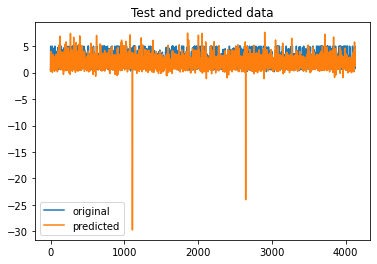

In [64]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

Training targets are in tens of thousands of dollars so the RMSE is almost an error of $10,000 and our visualization doesn't look good either... Lets now use grid search and try some hyperparameters as well and see if this can be improved:

In [65]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 100)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=100, verbose=2, cv=5, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ....C=38.454011884736246, gamma=0.07969454818643928; total time=  17.1s
[CV] END ....C=38.454011884736246, gamma=0.07969454818643928; total time=  17.1s
[CV] END ....C=38.454011884736246, gamma=0.07969454818643928; total time=  16.7s
[CV] END ....C=38.454011884736246, gamma=0.07969454818643928; total time=  16.8s
[CV] END ....C=38.454011884736246, gamma=0.07969454818643928; total time=  16.6s
[CV] END .....C=74.1993941811405, gamma=0.015751320499779724; total time=  13.3s
[CV] END .....C=74.1993941811405, gamma=0.015751320499779724; total time=  13.7s
[CV] END .....C=74.1993941811405, gamma=0.015751320499779724; total time=  13.5s
[CV] END .....C=74.1993941811405, gamma=0.015751320499779724; total time=  13.6s
[CV] END .....C=74.1993941811405, gamma=0.015751320499779724; total time=  13.4s
[CV] END ....C=16.60186404424365, gamma=0.002051110418843397; total time=   9.5s
[CV] END ....C=16.60186404424365, gamma=0.0020

[CV] END ...C=13.203823484477883, gamma=0.009780337016659405; total time=   9.5s
[CV] END ...C=13.203823484477883, gamma=0.009780337016659405; total time=   9.6s
[CV] END ...C=13.203823484477883, gamma=0.009780337016659405; total time=   9.6s
[CV] END ...C=13.203823484477883, gamma=0.009780337016659405; total time=   9.5s
[CV] END ......C=4.43885211152184, gamma=0.06586289317583108; total time=   9.4s
[CV] END ......C=4.43885211152184, gamma=0.06586289317583108; total time=   9.4s
[CV] END ......C=4.43885211152184, gamma=0.06586289317583108; total time=   9.4s
[CV] END ......C=4.43885211152184, gamma=0.06586289317583108; total time=   9.4s
[CV] END ......C=4.43885211152184, gamma=0.06586289317583108; total time=   9.4s
[CV] END .....C=26.87799816000169, gamma=0.02113705944064572; total time=  10.9s
[CV] END .....C=26.87799816000169, gamma=0.02113705944064572; total time=  11.1s
[CV] END .....C=26.87799816000169, gamma=0.02113705944064572; total time=  11.0s
[CV] END .....C=26.877998160

[CV] END .....C=87.31034258755935, gamma=0.01764396768338154; total time=  14.5s
[CV] END .....C=87.31034258755935, gamma=0.01764396768338154; total time=  14.4s
[CV] END ...C=34.08980248526492, gamma=0.0013400367243354798; total time=   9.6s
[CV] END ...C=34.08980248526492, gamma=0.0013400367243354798; total time=   9.4s
[CV] END ...C=34.08980248526492, gamma=0.0013400367243354798; total time=   9.5s
[CV] END ...C=34.08980248526492, gamma=0.0013400367243354798; total time=   9.7s
[CV] END ...C=34.08980248526492, gamma=0.0013400367243354798; total time=   9.5s
[CV] END ...C=32.098232171566224, gamma=0.004470608546778489; total time=  10.0s
[CV] END ...C=32.098232171566224, gamma=0.004470608546778489; total time=   9.8s
[CV] END ...C=32.098232171566224, gamma=0.004470608546778489; total time=   9.8s
[CV] END ...C=32.098232171566224, gamma=0.004470608546778489; total time=   9.9s
[CV] END ...C=32.098232171566224, gamma=0.004470608546778489; total time=   9.9s
[CV] END .....C=73.960617833

[CV] END ...C=32.80034749718639, gamma=0.0016599837974449214; total time=   9.7s
[CV] END ...C=32.80034749718639, gamma=0.0016599837974449214; total time=   9.6s
[CV] END ...C=32.80034749718639, gamma=0.0016599837974449214; total time=   9.6s
[CV] END ...C=32.80034749718639, gamma=0.0016599837974449214; total time=   9.6s
[CV] END ...C=32.80034749718639, gamma=0.0016599837974449214; total time=   9.5s
[CV] END ...C=23.793516254194166, gamma=0.007148510793512982; total time=   9.9s
[CV] END ...C=23.793516254194166, gamma=0.007148510793512982; total time=   9.9s
[CV] END ...C=23.793516254194166, gamma=0.007148510793512982; total time=   9.9s
[CV] END ...C=23.793516254194166, gamma=0.007148510793512982; total time=  10.0s
[CV] END ...C=23.793516254194166, gamma=0.007148510793512982; total time=   9.8s
[CV] END .....C=82.80147659224932, gamma=0.05265761277157425; total time=  21.4s
[CV] END .....C=82.80147659224932, gamma=0.05265761277157425; total time=  21.1s
[CV] END .....C=82.801476592

[CV] END ....C=64.35297107608946, gamma=0.011790965486776304; total time=  12.4s
[CV] END ....C=64.35297107608946, gamma=0.011790965486776304; total time=  12.5s
[CV] END ....C=64.35297107608946, gamma=0.011790965486776304; total time=  12.5s
[CV] END .....C=10.02897700544083, gamma=0.04683871708118727; total time=  10.3s
[CV] END .....C=10.02897700544083, gamma=0.04683871708118727; total time=  10.2s
[CV] END .....C=10.02897700544083, gamma=0.04683871708118727; total time=  10.2s
[CV] END .....C=10.02897700544083, gamma=0.04683871708118727; total time=  10.3s
[CV] END .....C=10.02897700544083, gamma=0.04683871708118727; total time=  10.2s
[CV] END ...C=33.07800649717358, gamma=0.0023606794572813058; total time=   9.6s
[CV] END ...C=33.07800649717358, gamma=0.0023606794572813058; total time=   9.6s
[CV] END ...C=33.07800649717358, gamma=0.0023606794572813058; total time=   9.7s
[CV] END ...C=33.07800649717358, gamma=0.0023606794572813058; total time=   9.7s
[CV] END ...C=33.07800649717

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B0C1AB88D0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B0C3AC3DD8>},
                   random_state=42, verbose=2)

In [66]:
rnd_search_cv.best_estimator_

SVR(C=8.455064367977082, gamma=0.09413993046829941)

In [67]:
#training set
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5574867986900188

Numbers looking better now, lets now check on our test set and then visualize everything in a plot again:

In [68]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  1.4767095692351608
RMSE:  0.7383547846175804


### View Data Performance Graphically

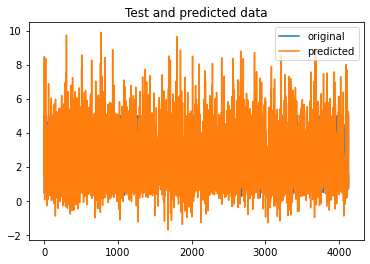

In [69]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

#Half-Decent Results